In [3]:
!pip install numpy tensorflow opencv-python matplotlib

In [5]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

1. Import Data

In [10]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        img = Image.open(os.path.join(directory, filename))
        img = img.resize((224, 224))
        img = img.convert('RGB')
        img = np.array(img) / 255.0
        images.append(img)

    return images

In [11]:
alligator_images = load_images('/content/drive/MyDrive/alligator vs crocodile/alligator')
crocodile_images = load_images('/content/drive/MyDrive/alligator vs crocodile/crocodile')

In [12]:
print(type(crocodile_images))
print(len(crocodile_images))
print(crocodile_images[0].shape if len(crocodile_images) > 0 else "Empty list")


<class 'list'>
1150
(224, 224, 3)


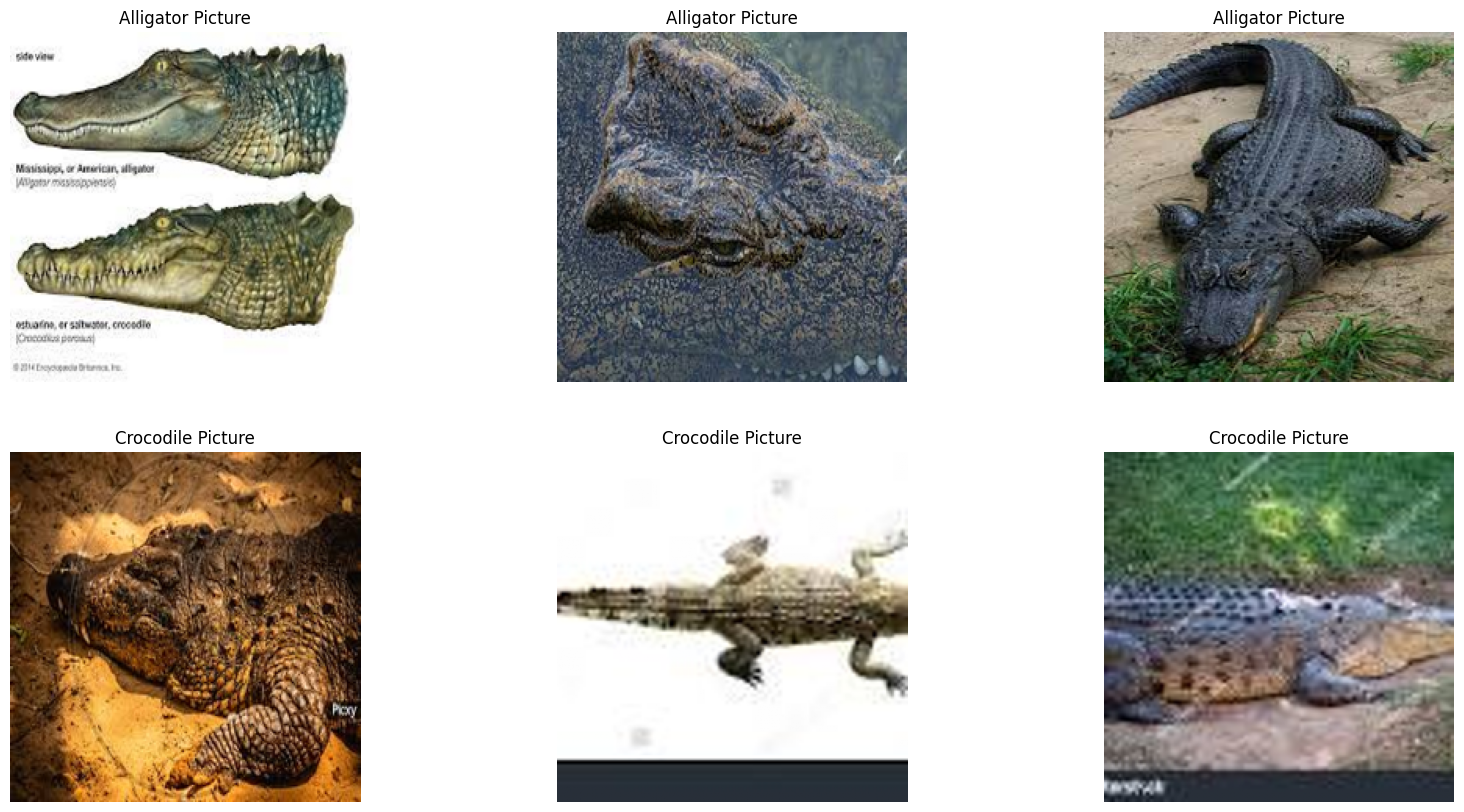

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Menampilkan gambar Alligator
for i in range(min(3, len(alligator_images))):
    axes[0, i].imshow(alligator_images[i])  # Menampilkan gambar Alligator
    axes[0, i].set_title('Alligator Picture')  # Menetapkan judul
    axes[0, i].axis('off')  # Mematikan axis

# Menampilkan gambar Almonds
for i in range(min(3, len(crocodile_images))):
    axes[1, i].imshow(crocodile_images[i])  # Menampilkan gambar Buaya
    axes[1, i].set_title('Crocodile Picture')  # Menetapkan judul
    axes[1, i].axis('off')  # Mematikan axis

plt.show()  # Menampilkan hasil


In [14]:
type(alligator_images)

list

In [15]:
len(alligator_images)

150

In [16]:
len(crocodile_images)

1150

2. Labeling

In [17]:
def assign_labels(alligator_images, crocodile_images):
    alligator_labels = np.ones(len(alligator_images))
    crocodile_labels = np.zeros(len(crocodile_images))
    return alligator_labels, crocodile_labels

alligator_labels, crocodile_labels = assign_labels(alligator_images, crocodile_images)

In [18]:
alligator_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
crocodile_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
 data = alligator_images + crocodile_images
 labels = np.concatenate((alligator_labels, crocodile_labels) , axis=0)

In [21]:
data

[array([[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        ...,
 
        [[0.98039216, 0.98039216, 0.98039216],
         [0.98039216, 0.98039216, 0.98039

In [22]:
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [23]:
data[0].shape

(224, 224, 3)

3. Spliting Data

In [24]:
X = np.array(data)
y = np.array(labels)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [26]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

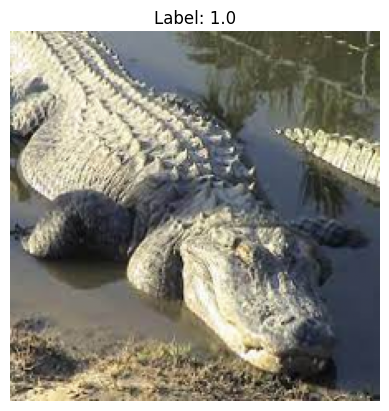

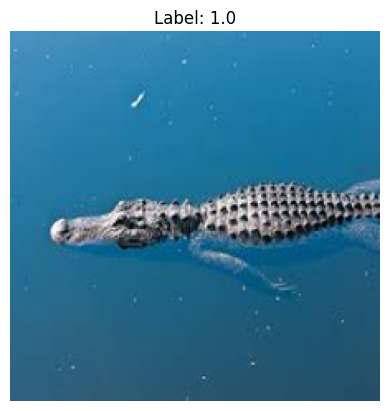

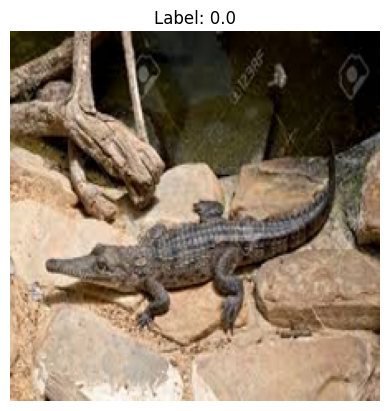

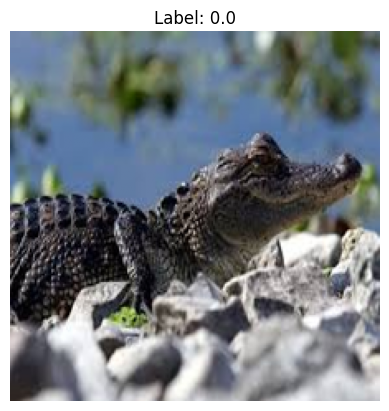

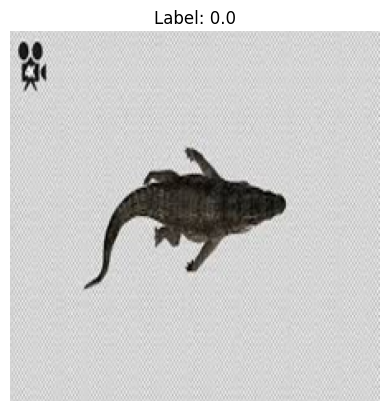

In [27]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [28]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [29]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
text = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

4. Training Data

In [30]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     100,933,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer = 'adam',
              loss= 'binary_crossentropy',
              metrics=["accuracy"])

In [33]:
history = model.fit(train, validation_data = val, epochs = 10, verbose = 1)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.7447 - loss: 12.7149 - val_accuracy: 0.9500 - val_loss: 0.5186
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.8640 - loss: 0.5521 - val_accuracy: 0.9500 - val_loss: 0.2520
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.8884 - loss: 0.3546 - val_accuracy: 0.9500 - val_loss: 0.2247
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.8898 - loss: 0.2973 - val_accuracy: 0.9500 - val_loss: 0.1877
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.9006 - loss: 0.2640 - val_accuracy: 0.9000 - val_loss: 0.1734
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.9041 - loss: 0.2293 - val_accuracy: 0.9000 - val_loss: 0.1703
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.9181 - loss: 0.1880 - val_accuracy: 0.9000 - val_loss: 0.1246
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.9387 - loss: 0.1621 - val_accuracy: 1.0000 - 

In [ ]:
evaluation = model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1000ms/step - accuracy: 0.8532 - loss: 0.6933


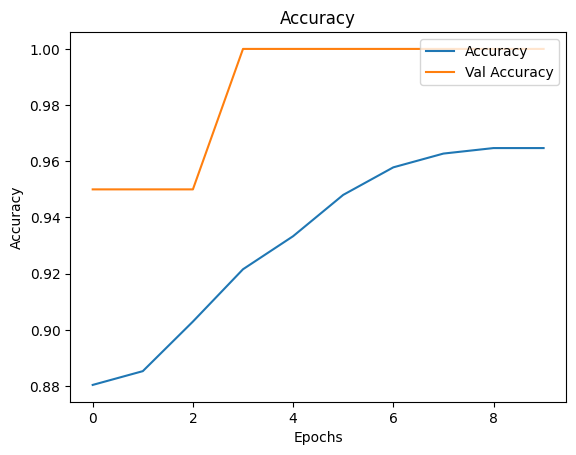

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper right')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

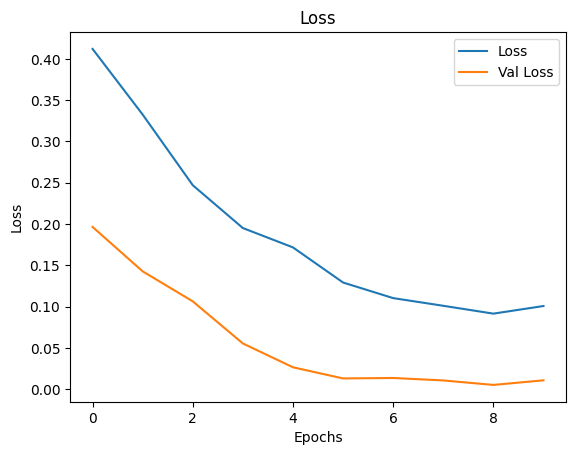

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc='upper right')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

5. Testing

In [34]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        return "Alligator detected"
    else:
        return "Crocodile detected"

Saving crocodile8.jpeg to crocodile8 (1).jpeg


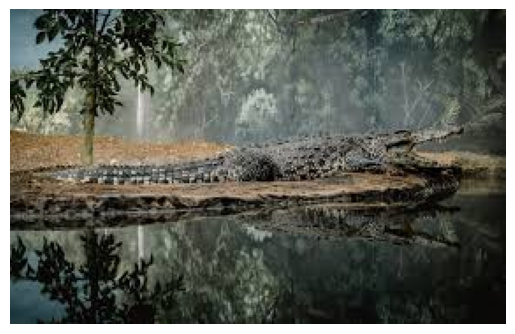

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Crocodile detected


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]

img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)